### House Pricing Assignment- Advanced Regression

###### Importing Required Libraries

In [599]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet as ch
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')

###### Reading dataset and creating dataframe

checking encoding format of the file by reading first 10000 bytes by chardet library

In [600]:
with open(r"D:\train.csv", 'rb') as rawdata:
    result = ch.detect(rawdata.read(10000))
    
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


It shows with 100% confidence that the file read is in 'ascii' format.

Reading file by providing encoding format as "ascii"

In [601]:
df=pd.read_csv(r"D:\train.csv", encoding='ascii')

Analyzing format, variables of the data provided

In [602]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


checking shape of the dataframe

In [603]:
df.shape

(1460, 81)

Checking Non-null count and dtype of each column

In [604]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Accroding to data dictionary, NA filled in the below columns are not null values but a category for each variable. Therefore replacing it with None

In [605]:
replace_NA = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in replace_NA:
    df[i].fillna("None", inplace=True)

In [606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

###### Observations:

*It can be observed that null values are present in some columns such as LotFrontage, GarageYrBlt

Dropping columns having null values more than 10 percent

In [607]:
thresh = len(df) * .90
df.dropna(thresh = thresh, axis = 1, inplace = True)

In [608]:
df.shape

(1460, 80)

In [609]:
pd.options.display.max_rows = 100
print(df.isnull().sum())

Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0


As observed from above, we have MasVnrType, MasVnrArea, GarageYrBlt and Electrical has 8,8, 1 and 81 missing values respectively, we can impute missing values

In [610]:
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True) #Numerical
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)   #Numerical
df["MasVnrType"].fillna("None", inplace=True)

Dropping row having missing value for Electrical

In [611]:
df.dropna(inplace=True)

#### Exploring data further and analyzing features

Checking for duplicate entires on the basis of instant column i.e Id.
If the entire row content matches along with the index, it will give us an info of duplicate entry made.

In [612]:
df_notdup=df.drop_duplicates(keep='first')
df_notdup.shape

(1459, 80)

No duplicate entires are made as shape remains same even after removing duplicates

Dropping 'Id' column as it will not add value to the analysis

In [613]:
df=df.drop(['Id'],axis=1)

Dataset is a mix of both categorical and numerical columns, seperating both as categorical variables need to be converted to numerical variables for further analysis

Checking for skewness of SalePrice as in skewed data, the tail region may act as an outlier for the statistical model and as known that outliers adversely affect the model’s performance especially regression-based models.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

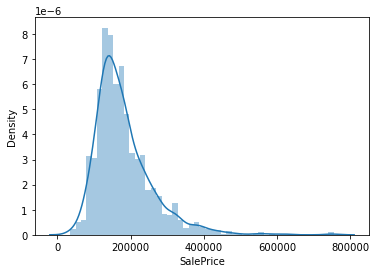

In [614]:
sns.distplot(df["SalePrice"])

As observed we have a skewed data then it may harm our results. So, in order to use a skewed data we have to apply a log transformation over the whole set of values to discover patterns in the data and make it usable for the statistical model.

In [615]:
df["LogSalePrice"] = np.log(df["SalePrice"])

<AxesSubplot:xlabel='LogSalePrice', ylabel='Density'>

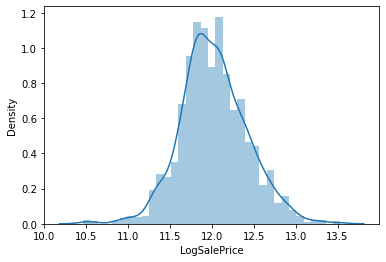

In [616]:
sns.distplot(df["LogSalePrice"])

Applying log transformation on SalePrice helped to make variable normally distributed

In [617]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotArea        1459 non-null   int64  
 3   Street         1459 non-null   object 
 4   Alley          1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

Listing out all categorical variables for coverting them to ordered categorical variable (numerical)

In [618]:
cat_vars=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
len(cat_vars)

43

In [619]:
for i in cat_vars:
    feature_index = set(df[i])
    for j in feature_index:
        feature_list = list(feature_index)
        df.loc[df[i] == j, i] = feature_list.index(j)

In [620]:
df.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalePrice
0,60,0,8450,0,0,1,3,1,0,1,...,0,1,0,0,2,2008,4,0,208500,12.247694
1,20,0,9600,0,0,1,3,1,3,1,...,0,1,0,0,5,2007,4,0,181500,12.109011
2,60,0,11250,0,0,3,3,1,0,1,...,0,1,0,0,9,2008,4,0,223500,12.317167
3,70,0,9550,0,0,3,3,1,4,1,...,0,1,0,0,2,2006,4,5,140000,11.849398
4,60,0,14260,0,0,3,3,1,3,1,...,0,1,0,0,12,2008,4,0,250000,12.429216


Plotting correlation on a heatmap

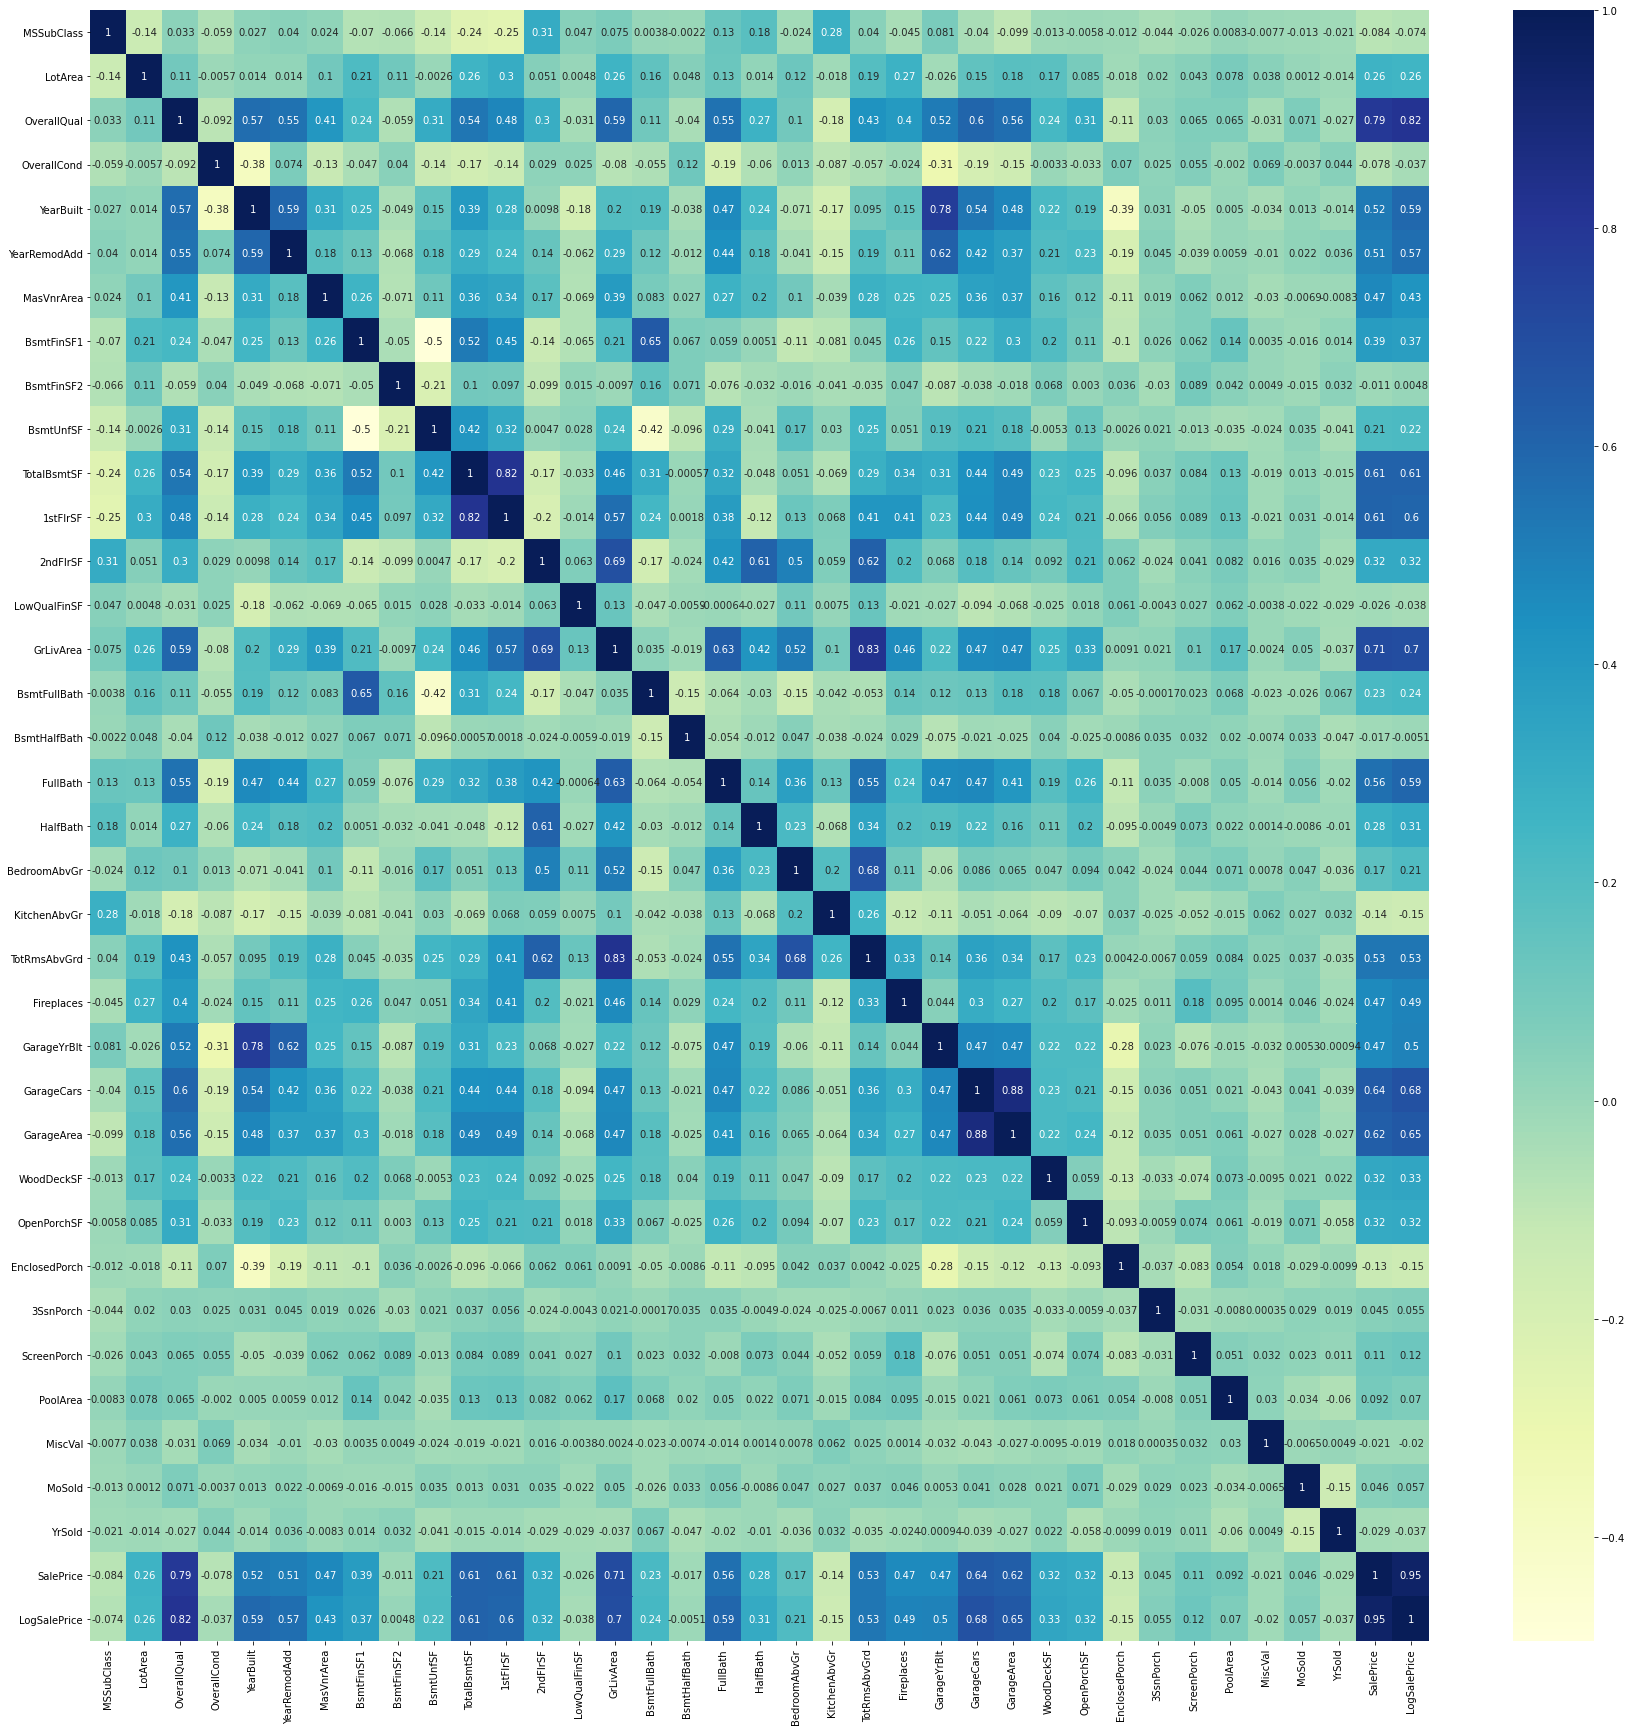

In [621]:
cor = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of price with independent variables such as OverallQual, YearBuilt, TotalBsmntSF and 1stFlrSF

Correlation among independent variables YearBuilt, YearRemodAdd, BsmtFullBath, BsmtFinSF1

Thus, while building the model, we'll have to pay attention to multicollinearity especially such as linear and logistic regression

##### Data preparation for model building

###### Dividing X and Y sets for model building

Dropping SalePrice and LogSalePrice as they are target variables

In [622]:
X = df.drop(["SalePrice","LogSalePrice"], axis=1)
y= df['LogSalePrice']

Splitting test and training data for model building

In [623]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

#### Model Building and Evaluation

###### Linear Regression

In [624]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Printing coefficients and Intercept

In [625]:
print(lm.intercept_)
print(lm.coef_)

14.961606945499126
[-3.67153172e-04  7.18097830e-03  1.96032756e-06 -2.07873024e-01
 -1.57038029e-02  2.81543176e-03 -9.69665607e-03  8.91345762e-02
  2.83757490e-03  1.49368175e-02 -5.00974351e-04 -6.64000979e-03
 -1.24090074e-02 -3.03425619e-02  2.50362627e-03  5.59481482e-02
  4.72232684e-02  2.11263401e-03  7.81798995e-04 -5.71276137e-03
  5.13884264e-03  7.86238970e-03 -6.55557672e-03  3.37969823e-03
  2.38188371e-05  8.49013215e-03 -1.63884756e-02 -1.13853115e-02
  7.75149120e-03 -2.79377595e-03 -8.94727189e-03 -5.51251569e-04
  6.35339617e-05  7.28858103e-03  5.10687581e-05 -1.48152612e-06
  1.13121195e-04  1.33908576e-02  7.81655099e-03  7.24098002e-02
  3.61337423e-03  8.67837568e-05  8.06491796e-05 -4.28918223e-05
  1.24541112e-04  3.59074251e-02 -4.58500272e-03  2.95433505e-02
  3.21469222e-02 -6.25597148e-03 -7.86089639e-02  1.38271323e-02
  1.22152935e-02  1.33033597e-02  3.61291264e-02  3.20552530e-03
  1.00469221e-03 -5.32149696e-04 -9.19135727e-03  2.25459832e-02
  1.24

Checking Rsquare score on both train and test data

In [626]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.9108527357864808
0.13489819341651732


`Note`: It can be observed from r square score that the linear regression model performs very badly on the test data

##### Ridge Regression

list of alphas to tune - if value too high it will lead to underfitting, if it is too low, it will not handle the overfitting

In [627]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
ridge = Ridge()

Using cross-validation technique

In [628]:
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

To find best hyperparameter alpha

In [629]:
print(model_cv.best_params_)

{'alpha': 0.2}


Fitting Ridge model for alpha = 0.2 and printing penalised coefficients

Also visualizing alpha through graph

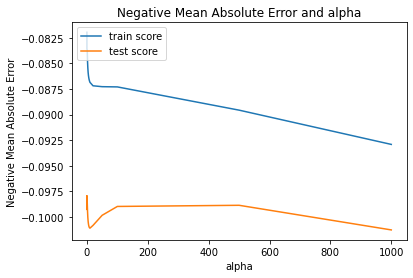

In [630]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [646]:
alpha = 0.2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ls=list(zip(ridge.coef_, X_train.columns))
print(sorted(ls))

[(-0.19948763209910378, 'Street'), (-0.07761275909669703, 'KitchenAbvGr'), (-0.030813715860675647, 'BldgType'), (-0.016505261707448378, 'MiscFeature'), (-0.016366852716706203, 'Alley'), (-0.015815077041136282, 'ExterCond'), (-0.013091587443692047, 'GarageQual'), (-0.012333487240918196, 'Condition2'), (-0.011053698366377308, 'Foundation'), (-0.009553253169041579, 'GarageFinish'), (-0.009245765881697274, 'SaleCondition'), (-0.009239765109510606, 'LandContour'), (-0.009042401007866947, 'BsmtExposure'), (-0.00793302011121354, 'PoolArea'), (-0.006837783021065764, 'Condition1'), (-0.006420839500298869, 'Exterior2nd'), (-0.006401665551816611, 'RoofStyle'), (-0.005701794493141993, 'BedroomAbvGr'), (-0.004929412077177942, 'Fence'), (-0.004679388649943717, 'YrSold'), (-0.0033737721162936593, 'BsmtCond'), (-0.00088603077391448, 'MoSold'), (-0.0005640336488769729, 'GarageYrBlt'), (-0.0005584087180131168, 'BsmtFinType1'), (-0.0004824417088914946, 'Neighborhood'), (-0.0003841663170584001, 'MSSubClas

In [632]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.9105424296826512
0.26147824793640695


##### Lasso Regression

In [633]:
lasso = Lasso()
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Finding the best hyperparameter alpha

In [634]:
print(model_cv.best_params_)

{'alpha': 0.001}


Also visualizing alpha through graph

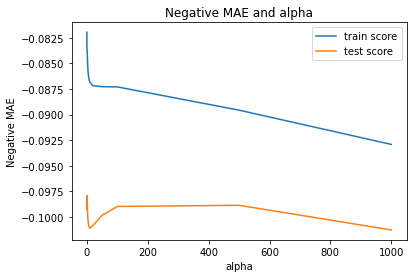

In [635]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative MAE')
plt.title("Negative MAE and alpha")
plt.legend(['train score', 'test score'])
plt.show()

Lasso model for alpha=0.001 and penalized coefficients

In [647]:
alpha =0.01
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
ls=list(zip(lasso.coef_, X_train.columns))
print(sorted(ls))

[(-0.0055257326702685934, 'Condition1'), (-0.0036521180248368893, 'SaleCondition'), (-0.003436920255057749, 'Foundation'), (-0.0033983807049518585, 'YrSold'), (-0.0017643567391876606, 'PoolArea'), (-0.0013271279202813505, 'Exterior2nd'), (-0.000726766437349885, 'GarageYrBlt'), (-0.0006755059196231028, 'MSSubClass'), (-0.0004167220308721698, 'Neighborhood'), (-8.132911727576616e-05, 'OpenPorchSF'), (-4.177808664270356e-06, 'MasVnrArea'), (-3.306000875027438e-06, 'MiscVal'), (-0.0, 'Alley'), (0.0, 'BedroomAbvGr'), (-0.0, 'BldgType'), (-0.0, 'BsmtCond'), (-0.0, 'BsmtExposure'), (0.0, 'BsmtFinType1'), (0.0, 'BsmtFullBath'), (0.0, 'BsmtHalfBath'), (0.0, 'BsmtQual'), (0.0, 'CentralAir'), (-0.0, 'Condition2'), (0.0, 'Electrical'), (-0.0, 'ExterCond'), (0.0, 'ExterQual'), (-0.0, 'Fence'), (0.0, 'FireplaceQu'), (0.0, 'FullBath'), (0.0, 'GarageCars'), (-0.0, 'GarageCond'), (-0.0, 'GarageFinish'), (-0.0, 'GarageQual'), (0.0, 'GarageType'), (0.0, 'HalfBath'), (0.0, 'Heating'), (0.0, 'HouseStyle'),

In [637]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.8654075486617334
0.7900589757186178
